In [1]:
import numpy as np
import pandas as pd
import warnings
import calendar
warnings.filterwarnings('ignore')

# import libraties
import matplotlib.pyplot as plt
import seaborn as sns
#Suppressing scientific notation to float only 
pd.options.display.float_format = '{:,.2f}'.format

from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [2]:
#Import the Camera Accessory data set
cam_access=pd.read_csv('E:/Data Analytics/PGDDS/Domain Elective/Capstone_csv/CameraAccessory.csv')
cam_access.head()

,Unnamed: 0,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,...,inc_PO_MA3,LP_lag_1_per,LP_lag_2_per,LP_lag_3_per,PO_lag_1_per-1,PO_lag_1_per-2,PO_lag_1_per-3,GMV_lag_1_per,GMV_lag_2_per,GMV_lag_3_per
0,0,2015-10-17,2015,10,"3,419,300,926,147,000.00","3,419,300,926,147,000.00","6,400.00",1,0,0,...,nan,-0.07,2.22,2.79,1.72,1.12,-0.44,-0.07,2.22,2.79
1,1,2015-10-19,2015,10,"1,420,830,839,915,200.00","1,420,830,839,915,200.00","6,900.00",1,0,0,...,nan,2.47,3.08,3.26,-0.22,-0.79,-0.82,2.47,3.08,3.26
2,2,2015-10-20,2015,10,"2,421,912,925,714,800.00","2,421,912,925,714,800.00","1,990.00",1,0,0,...,nan,0.18,0.23,-0.40,-0.73,-0.77,-0.71,0.18,0.23,-0.40
3,3,2015-10-14,2015,10,"4,416,592,101,738,400.00","4,416,592,101,738,400.00","1,690.00",1,0,0,...,0.96,0.04,-0.49,-0.54,-0.15,0.09,1.26,0.04,-0.49,-0.54
4,4,2015-10-17,2015,10,"4,419,525,153,426,400.00","4,419,525,153,426,400.00","1,618.00",1,0,0,...,0.78,-0.51,-0.56,-0.56,0.29,1.66,1.66,-0.51,-0.56,-0.56


In [3]:
# Drop unnamed variable column
cam_access = cam_access.drop(['Unnamed: 0'], axis=1)
cam_access.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,...,inc_PO_MA3,LP_lag_1_per,LP_lag_2_per,LP_lag_3_per,PO_lag_1_per-1,PO_lag_1_per-2,PO_lag_1_per-3,GMV_lag_1_per,GMV_lag_2_per,GMV_lag_3_per
0,2015-10-17,2015,10,"3,419,300,926,147,000.00","3,419,300,926,147,000.00","6,400.00",1,0,0,COD,...,nan,-0.07,2.22,2.79,1.72,1.12,-0.44,-0.07,2.22,2.79
1,2015-10-19,2015,10,"1,420,830,839,915,200.00","1,420,830,839,915,200.00","6,900.00",1,0,0,COD,...,nan,2.47,3.08,3.26,-0.22,-0.79,-0.82,2.47,3.08,3.26
2,2015-10-20,2015,10,"2,421,912,925,714,800.00","2,421,912,925,714,800.00","1,990.00",1,0,0,COD,...,nan,0.18,0.23,-0.40,-0.73,-0.77,-0.71,0.18,0.23,-0.40
3,2015-10-14,2015,10,"4,416,592,101,738,400.00","4,416,592,101,738,400.00","1,690.00",1,0,0,Prepaid,...,0.96,0.04,-0.49,-0.54,-0.15,0.09,1.26,0.04,-0.49,-0.54
4,2015-10-17,2015,10,"4,419,525,153,426,400.00","4,419,525,153,426,400.00","1,618.00",1,0,0,Prepaid,...,0.78,-0.51,-0.56,-0.56,0.29,1.66,1.66,-0.51,-0.56,-0.56


In [4]:
# Drop lag, MA and GMV columns
cam_access = cam_access.drop(['inc_LP_MA1','inc_LP_MA2','inc_LP_MA3','inc_PO_MA1','inc_PO_MA2','inc_PO_MA3','LP_lag_1_per',
           'LP_lag_2_per','LP_lag_3_per','PO_lag_1_per-1','PO_lag_1_per-2','PO_lag_1_per-1','GMV_lag_1_per','GMV_lag_2_per',
           'GMV_lag_3_per','PO_lag_1_per-3'], axis=1)
cam_access.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,...,month_date,TV_adstock,Digital_adstock,Sponsorship_adstock,Content Marketing_adstock,Online Marketing_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock
0,2015-10-17,2015,10,"3,419,300,926,147,000.00","3,419,300,926,147,000.00","6,400.00",1,0,0,COD,...,2015-10-17-10,"13,875,154.09","28,502,373.67","191,196,038.93","7,776,943.00","55,033,046.50","15,747,089.60","72,093,251.50",0.00,0.00
1,2015-10-19,2015,10,"1,420,830,839,915,200.00","1,420,830,839,915,200.00","6,900.00",1,0,0,COD,...,2015-10-19-10,"20,812,731.13","42,753,560.50","286,794,058.40","11,665,414.50","82,549,569.75","23,620,634.40","108,139,877.25",0.00,0.00
2,2015-10-20,2015,10,"2,421,912,925,714,800.00","2,421,912,925,714,800.00","1,990.00",1,0,0,COD,...,2015-10-20-10,"24,281,519.65","49,879,153.92","334,593,068.13","13,609,650.25","96,307,831.38","27,557,406.80","126,163,190.13",0.00,0.00
3,2015-10-14,2015,10,"4,416,592,101,738,400.00","4,416,592,101,738,400.00","1,690.00",1,0,0,Prepaid,...,2015-10-14-10,"26,015,913.91","53,441,950.62","358,492,572.99","14,581,768.12","103,186,962.19","29,525,793.00","135,174,846.56",0.00,0.00
4,2015-10-17,2015,10,"4,419,525,153,426,400.00","4,419,525,153,426,400.00","1,618.00",1,0,0,Prepaid,...,2015-10-17-10,"26,883,111.04","55,223,348.98","370,442,325.43","15,067,827.06","106,626,527.60","30,509,986.10","139,680,674.78",0.00,0.00


In [5]:
# Drop unwanted variable columns
cam_access = cam_access.drop(['Year','Month','order_id','order_item_id','order_date','week_y','wday','week'], axis=1)
cam_access.head()

,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,...,month_date,TV_adstock,Digital_adstock,Sponsorship_adstock,Content Marketing_adstock,Online Marketing_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock
0,"6,400.00",1,0,0,COD,5,CameraAccessory,CameraAccessory,CameraTripod,"7,190.00",...,2015-10-17-10,"13,875,154.09","28,502,373.67","191,196,038.93","7,776,943.00","55,033,046.50","15,747,089.60","72,093,251.50",0.00,0.00
1,"6,900.00",1,0,0,COD,7,CameraAccessory,CameraAccessory,CameraTripod,"7,190.00",...,2015-10-19-10,"20,812,731.13","42,753,560.50","286,794,058.40","11,665,414.50","82,549,569.75","23,620,634.40","108,139,877.25",0.00,0.00
2,"1,990.00",1,0,0,COD,10,CameraAccessory,CameraAccessory,CameraTripod,"2,099.00",...,2015-10-20-10,"24,281,519.65","49,879,153.92","334,593,068.13","13,609,650.25","96,307,831.38","27,557,406.80","126,163,190.13",0.00,0.00
3,"1,690.00",1,0,0,Prepaid,4,CameraAccessory,CameraAccessory,CameraTripod,"2,099.00",...,2015-10-14-10,"26,015,913.91","53,441,950.62","358,492,572.99","14,581,768.12","103,186,962.19","29,525,793.00","135,174,846.56",0.00,0.00
4,"1,618.00",1,0,0,Prepaid,6,CameraAccessory,CameraAccessory,CameraTripod,"2,099.00",...,2015-10-17-10,"26,883,111.04","55,223,348.98","370,442,325.43","15,067,827.06","106,626,527.60","30,509,986.10","139,680,674.78",0.00,0.00


In [6]:
#Renaming column
cam_access.rename({' Affiliates':'Affiliates'},axis=1, inplace=True)

In [7]:
#check the dtypes
cam_access.dtypes

gmv                              float64
units                              int64
deliverybdays                      int64
deliverycdays                      int64
s1_fact_order_payment_type        object
sla                                int64
product_analytic_category         object
product_analytic_sub_category     object
product_analytic_vertical         object
product_mrp                      float64
product_procurement_sla            int64
Pay_Day                            int64
is_holiday                         int64
special_sale                      object
Discount_Percentage              float64
gmvperunit                       float64
delivery_on_time                 float64
delivery_status                   object
Total Investment                 float64
TV                               float64
Digital                          float64
Sponsorship                      float64
Content Marketing                float64
Online marketing                 float64
SEM             

In [8]:
#Check size
cam_access.shape

(196350, 43)

In [9]:
#Checking unique values in delivery time variable 
cam_access['delivery_on_time'].unique()

array([   5.,    7.,    1.,    3.,    0.,    2.,    4.,    9.,    6.,
          8.,   10.,   -1.,   -2.,   -4.,   -3.,   12.,   11.,   -5.,
         -9.,   -7.,   -6.,   -8.,   17.,  -10.,   13.,   18.,   16.,
         14.,   19.,  -15.,   15.,   20.,  -14.,  -17.,  -11.,  -13.,
         21.,  -18.,   24.,   22.,   25.,   37.,   23.,   32.,   26.,
         27.,   35.,   31.,  -12.,  -25.,  -16.,  -23.,  -19.,  -22.,
        -21.,  -24.,  -26.,  -20.,  -38.,  -36., -109.,  -37.,  -29.,
        -40.,  -31.,  -28.,  -27.,  -34.,  -39.,   39.,   34.,  -32.,
        -33.,  -43.,  -30., -136.])

In [10]:
#Delivery time can't be negative hence taking positive values
cam_access=cam_access.loc[(cam_access['delivery_on_time']>0)]
cam_access.head()

,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,...,month_date,TV_adstock,Digital_adstock,Sponsorship_adstock,Content Marketing_adstock,Online Marketing_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock
0,"6,400.00",1,0,0,COD,5,CameraAccessory,CameraAccessory,CameraTripod,"7,190.00",...,2015-10-17-10,"13,875,154.09","28,502,373.67","191,196,038.93","7,776,943.00","55,033,046.50","15,747,089.60","72,093,251.50",0.00,0.00
1,"6,900.00",1,0,0,COD,7,CameraAccessory,CameraAccessory,CameraTripod,"7,190.00",...,2015-10-19-10,"20,812,731.13","42,753,560.50","286,794,058.40","11,665,414.50","82,549,569.75","23,620,634.40","108,139,877.25",0.00,0.00
2,"1,990.00",1,0,0,COD,10,CameraAccessory,CameraAccessory,CameraTripod,"2,099.00",...,2015-10-20-10,"24,281,519.65","49,879,153.92","334,593,068.13","13,609,650.25","96,307,831.38","27,557,406.80","126,163,190.13",0.00,0.00
3,"1,690.00",1,0,0,Prepaid,4,CameraAccessory,CameraAccessory,CameraTripod,"2,099.00",...,2015-10-14-10,"26,015,913.91","53,441,950.62","358,492,572.99","14,581,768.12","103,186,962.19","29,525,793.00","135,174,846.56",0.00,0.00
4,"1,618.00",1,0,0,Prepaid,6,CameraAccessory,CameraAccessory,CameraTripod,"2,099.00",...,2015-10-17-10,"26,883,111.04","55,223,348.98","370,442,325.43","15,067,827.06","106,626,527.60","30,509,986.10","139,680,674.78",0.00,0.00


In [11]:
#Selecting numeric data
log_cols = cam_access.select_dtypes(['float64','int64']).columns

In [12]:
#checking detail info
cam_access.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122702 entries, 0 to 196349
Data columns (total 43 columns):
gmv                              122702 non-null float64
units                            122702 non-null int64
deliverybdays                    122702 non-null int64
deliverycdays                    122702 non-null int64
s1_fact_order_payment_type       122702 non-null object
sla                              122702 non-null int64
product_analytic_category        122702 non-null object
product_analytic_sub_category    122702 non-null object
product_analytic_vertical        122702 non-null object
product_mrp                      122702 non-null float64
product_procurement_sla          122702 non-null int64
Pay_Day                          122702 non-null int64
is_holiday                       122702 non-null int64
special_sale                     122702 non-null object
Discount_Percentage              122702 non-null float64
gmvperunit                       122702 non-null floa

In [13]:
#checking log cols
log_cols = list(set(log_cols)-
                set(['gmv','units']))

In [14]:
#check null data
cam_access[log_cols].lt(0).sum()

holiday_count                0
sla                          0
SEM                          0
deliverybdays                0
Other_adstock                0
Sponsorship_adstock          0
Online marketing             0
Affiliates_adstock           0
Affiliates                   0
delivery_on_time             0
product_mrp                  0
Sponsorship                  0
is_holiday                   0
TV_adstock                   0
Pay_Day                      0
Content Marketing_adstock    0
product_procurement_sla      0
TV                           0
Digital                      0
NPS                          0
Digital_adstock              0
Stock Index                  0
deliverycdays                0
Radio                        0
Radio_adstock                0
Total Investment             0
Other                        0
SEM_adstock                  0
gmvperunit                   0
Discount_Percentage          0
NPSScore                     0
Content Marketing            0
Online M

In [15]:
cam_access[log_cols].eq(0).sum()

holiday_count                 69972
sla                               0
SEM                               0
deliverybdays                121881
Other_adstock                 49928
Sponsorship_adstock               0
Online marketing                  0
Affiliates_adstock                0
Affiliates                        0
delivery_on_time                  0
product_mrp                       0
Sponsorship                       0
is_holiday                    97458
TV_adstock                        0
Pay_Day                      114983
Content Marketing_adstock         0
product_procurement_sla        1306
TV                                0
Digital                           0
NPS                               0
Digital_adstock                   0
Stock Index                       0
deliverycdays                121862
Radio                         83133
Radio_adstock                 50000
Total Investment                  0
Other                         83133
SEM_adstock                 

In [16]:
# We will add 1 to all columns before we take log. This will make any value between 0 and 1 (like percentages) > 1
# This is done to avoid negatives in the columns as the log of numbers between 0 and 1 would be less than 

cam_access[log_cols]+=1

In [17]:
# Transforming relevant columns to logs
cam_access[log_cols] =np.log(cam_access[log_cols])

In [18]:
#checking dataframe now
cam_access.head()

,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,...,month_date,TV_adstock,Digital_adstock,Sponsorship_adstock,Content Marketing_adstock,Online Marketing_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock
0,"6,400.00",1,0.00,0.00,COD,1.79,CameraAccessory,CameraAccessory,CameraTripod,8.88,...,2015-10-17-10,16.45,17.17,19.07,15.87,17.82,16.57,18.09,0.00,0.00
1,"6,900.00",1,0.00,0.00,COD,2.08,CameraAccessory,CameraAccessory,CameraTripod,8.88,...,2015-10-19-10,16.85,17.57,19.47,16.27,18.23,16.98,18.50,0.00,0.00
2,"1,990.00",1,0.00,0.00,COD,2.40,CameraAccessory,CameraAccessory,CameraTripod,7.65,...,2015-10-20-10,17.01,17.73,19.63,16.43,18.38,17.13,18.65,0.00,0.00
3,"1,690.00",1,0.00,0.00,Prepaid,1.61,CameraAccessory,CameraAccessory,CameraTripod,7.65,...,2015-10-14-10,17.07,17.79,19.70,16.50,18.45,17.20,18.72,0.00,0.00
4,"1,618.00",1,0.00,0.00,Prepaid,1.95,CameraAccessory,CameraAccessory,CameraTripod,7.65,...,2015-10-17-10,17.11,17.83,19.73,16.53,18.48,17.23,18.75,0.00,0.00


In [19]:
# Drop variable columns
cam_access = cam_access.drop(['month_date'], axis=1)
cam_access.head()

,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,...,ItemType,TV_adstock,Digital_adstock,Sponsorship_adstock,Content Marketing_adstock,Online Marketing_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock
0,"6,400.00",1,0.00,0.00,COD,1.79,CameraAccessory,CameraAccessory,CameraTripod,8.88,...,Luxury,16.45,17.17,19.07,15.87,17.82,16.57,18.09,0.00,0.00
1,"6,900.00",1,0.00,0.00,COD,2.08,CameraAccessory,CameraAccessory,CameraTripod,8.88,...,Luxury,16.85,17.57,19.47,16.27,18.23,16.98,18.50,0.00,0.00
2,"1,990.00",1,0.00,0.00,COD,2.40,CameraAccessory,CameraAccessory,CameraTripod,7.65,...,MassMarket,17.01,17.73,19.63,16.43,18.38,17.13,18.65,0.00,0.00
3,"1,690.00",1,0.00,0.00,Prepaid,1.61,CameraAccessory,CameraAccessory,CameraTripod,7.65,...,MassMarket,17.07,17.79,19.70,16.50,18.45,17.20,18.72,0.00,0.00
4,"1,618.00",1,0.00,0.00,Prepaid,1.95,CameraAccessory,CameraAccessory,CameraTripod,7.65,...,MassMarket,17.11,17.83,19.73,16.53,18.48,17.23,18.75,0.00,0.00


In [20]:
# Subset all categorical variables
ecart_CA_numerical = cam_access.select_dtypes(include=['int64','float64'])
ecart_CA_numerical.head()

,gmv,units,deliverybdays,deliverycdays,sla,product_mrp,product_procurement_sla,Pay_Day,is_holiday,Discount_Percentage,...,holiday_count,TV_adstock,Digital_adstock,Sponsorship_adstock,Content Marketing_adstock,Online Marketing_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock
0,"6,400.00",1,0.00,0.00,1.79,8.88,0.00,0.00,0.69,2.48,...,1.61,16.45,17.17,19.07,15.87,17.82,16.57,18.09,0.00,0.00
1,"6,900.00",1,0.00,0.00,2.08,8.88,0.00,0.00,0.00,1.62,...,0.00,16.85,17.57,19.47,16.27,18.23,16.98,18.50,0.00,0.00
2,"1,990.00",1,0.00,0.00,2.40,7.65,1.39,0.00,0.00,1.82,...,0.00,17.01,17.73,19.63,16.43,18.38,17.13,18.65,0.00,0.00
3,"1,690.00",1,0.00,0.00,1.61,7.65,1.39,0.00,0.00,3.02,...,1.61,17.07,17.79,19.70,16.50,18.45,17.20,18.72,0.00,0.00
4,"1,618.00",1,0.00,0.00,1.95,7.65,1.39,0.00,0.69,3.17,...,1.61,17.11,17.83,19.73,16.53,18.48,17.23,18.75,0.00,0.00


In [21]:
#checking detail info
ecart_CA_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122702 entries, 0 to 196349
Data columns (total 35 columns):
gmv                          122702 non-null float64
units                        122702 non-null int64
deliverybdays                122702 non-null float64
deliverycdays                122702 non-null float64
sla                          122702 non-null float64
product_mrp                  122702 non-null float64
product_procurement_sla      122702 non-null float64
Pay_Day                      122702 non-null float64
is_holiday                   122702 non-null float64
Discount_Percentage          122702 non-null float64
gmvperunit                   122702 non-null float64
delivery_on_time             122702 non-null float64
Total Investment             122702 non-null float64
TV                           122702 non-null float64
Digital                      122702 non-null float64
Sponsorship                  122702 non-null float64
Content Marketing            122702 non-nul

In [22]:
# Subset all categorical variables
ecart_CA_categorical = cam_access.select_dtypes(include=['object'])
ecart_CA_categorical.head()

,s1_fact_order_payment_type,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,special_sale,delivery_status,ItemType
0,COD,CameraAccessory,CameraAccessory,CameraTripod,Daussera,Early,Luxury
1,COD,CameraAccessory,CameraAccessory,CameraTripod,Regular Day,Early,Luxury
2,COD,CameraAccessory,CameraAccessory,CameraTripod,Regular Day,Early,MassMarket
3,Prepaid,CameraAccessory,CameraAccessory,CameraTripod,Regular Day,Early,MassMarket
4,Prepaid,CameraAccessory,CameraAccessory,CameraTripod,Daussera,Early,MassMarket


In [23]:
# Convert into dummies
ecart_CA_dummies = pd.get_dummies(ecart_CA_categorical, drop_first=True)
ecart_CA_dummies.head()

,s1_fact_order_payment_type_Prepaid,product_analytic_vertical_CameraAccessory,product_analytic_vertical_CameraBag,product_analytic_vertical_CameraBattery,product_analytic_vertical_CameraBatteryCharger,product_analytic_vertical_CameraBatteryGrip,product_analytic_vertical_CameraEyeCup,product_analytic_vertical_CameraFilmRolls,product_analytic_vertical_CameraHousing,product_analytic_vertical_CameraMicrophone,...,special_sale_Daussera,special_sale_Diwali,special_sale_Eid & Rathayatra,special_sale_FHSD,special_sale_Pacman,special_sale_Rakshabandhan,special_sale_Regular Day,special_sale_Republic Day,special_sale_Valentine Day,ItemType_MassMarket
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [24]:
# Drop categorical variable columns
cam_access = cam_access.drop(list(ecart_CA_categorical.columns), axis=1)

In [25]:
#checking datframe now
cam_access.head()

,gmv,units,deliverybdays,deliverycdays,sla,product_mrp,product_procurement_sla,Pay_Day,is_holiday,Discount_Percentage,...,holiday_count,TV_adstock,Digital_adstock,Sponsorship_adstock,Content Marketing_adstock,Online Marketing_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock
0,"6,400.00",1,0.00,0.00,1.79,8.88,0.00,0.00,0.69,2.48,...,1.61,16.45,17.17,19.07,15.87,17.82,16.57,18.09,0.00,0.00
1,"6,900.00",1,0.00,0.00,2.08,8.88,0.00,0.00,0.00,1.62,...,0.00,16.85,17.57,19.47,16.27,18.23,16.98,18.50,0.00,0.00
2,"1,990.00",1,0.00,0.00,2.40,7.65,1.39,0.00,0.00,1.82,...,0.00,17.01,17.73,19.63,16.43,18.38,17.13,18.65,0.00,0.00
3,"1,690.00",1,0.00,0.00,1.61,7.65,1.39,0.00,0.00,3.02,...,1.61,17.07,17.79,19.70,16.50,18.45,17.20,18.72,0.00,0.00
4,"1,618.00",1,0.00,0.00,1.95,7.65,1.39,0.00,0.69,3.17,...,1.61,17.11,17.83,19.73,16.53,18.48,17.23,18.75,0.00,0.00


In [70]:
# Concatenate dummy variables with X
ecart_CA = pd.concat([cam_access, ecart_CA_dummies], axis=1)
ecart_CA.head()

,gmv,units,deliverybdays,deliverycdays,sla,product_mrp,product_procurement_sla,Pay_Day,is_holiday,Discount_Percentage,...,special_sale_Daussera,special_sale_Diwali,special_sale_Eid & Rathayatra,special_sale_FHSD,special_sale_Pacman,special_sale_Rakshabandhan,special_sale_Regular Day,special_sale_Republic Day,special_sale_Valentine Day,ItemType_MassMarket
0,"6,400.00",1,0.00,0.00,1.79,8.88,0.00,0.00,0.69,2.48,...,1,0,0,0,0,0,0,0,0,0
1,"6,900.00",1,0.00,0.00,2.08,8.88,0.00,0.00,0.00,1.62,...,0,0,0,0,0,0,1,0,0,0
2,"1,990.00",1,0.00,0.00,2.40,7.65,1.39,0.00,0.00,1.82,...,0,0,0,0,0,0,1,0,0,1
3,"1,690.00",1,0.00,0.00,1.61,7.65,1.39,0.00,0.00,3.02,...,0,0,0,0,0,0,1,0,0,1
4,"1,618.00",1,0.00,0.00,1.95,7.65,1.39,0.00,0.69,3.17,...,1,0,0,0,0,0,0,0,0,1


In [71]:
#checking detail info
ecart_CA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122702 entries, 0 to 196349
Data columns (total 70 columns):
gmv                                               122702 non-null float64
units                                             122702 non-null int64
deliverybdays                                     122702 non-null float64
deliverycdays                                     122702 non-null float64
sla                                               122702 non-null float64
product_mrp                                       122702 non-null float64
product_procurement_sla                           122702 non-null float64
Pay_Day                                           122702 non-null float64
is_holiday                                        122702 non-null float64
Discount_Percentage                               122702 non-null float64
gmvperunit                                        122702 non-null float64
delivery_on_time                                  122702 non-null float64
Tot

In [72]:
#check size
ecart_CA.shape

(122702, 70)

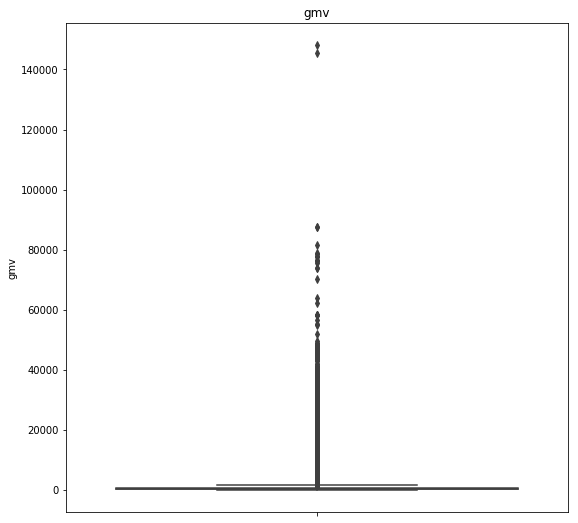

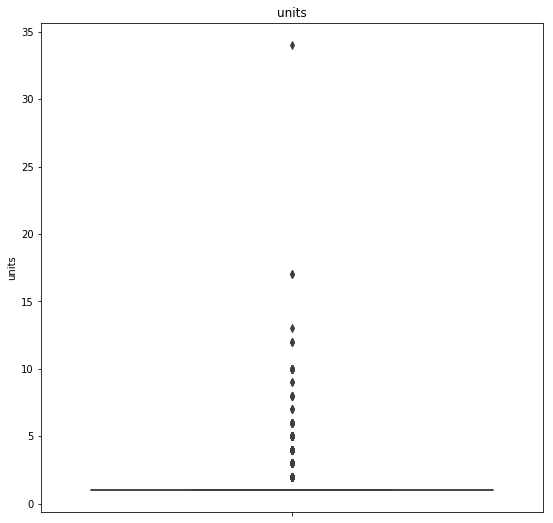

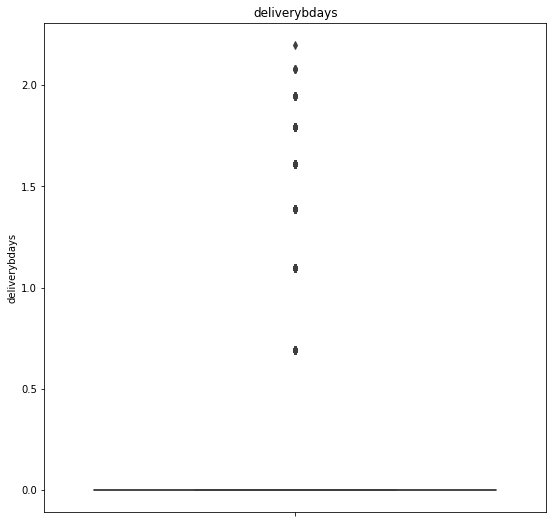

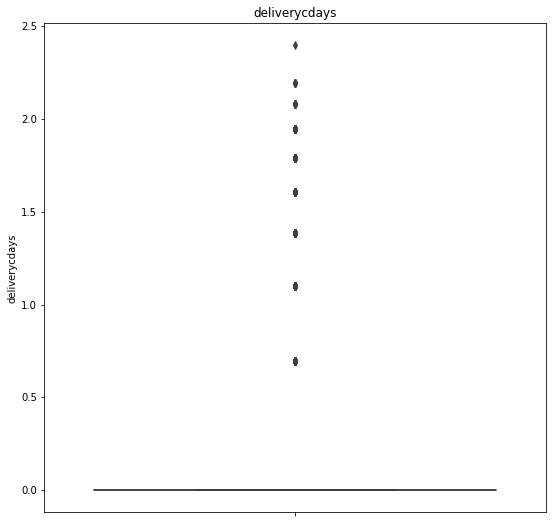

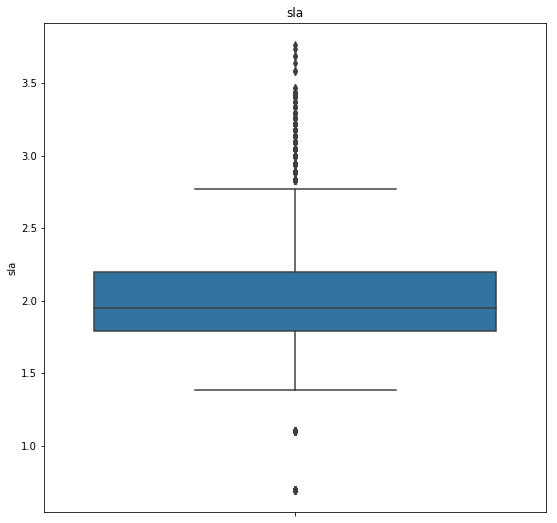

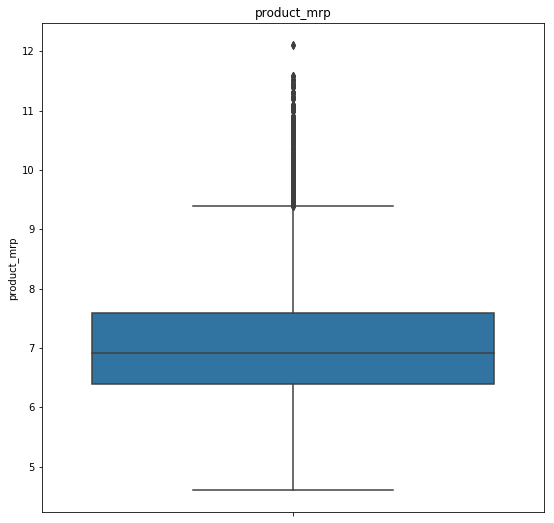

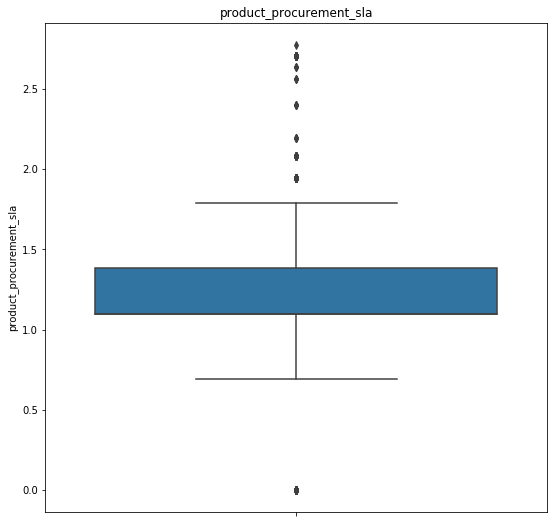

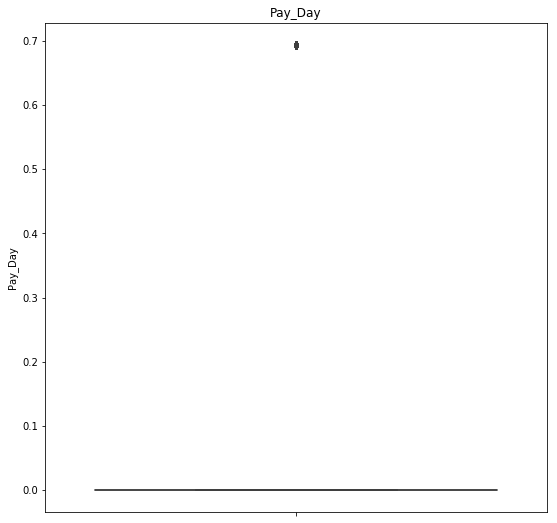

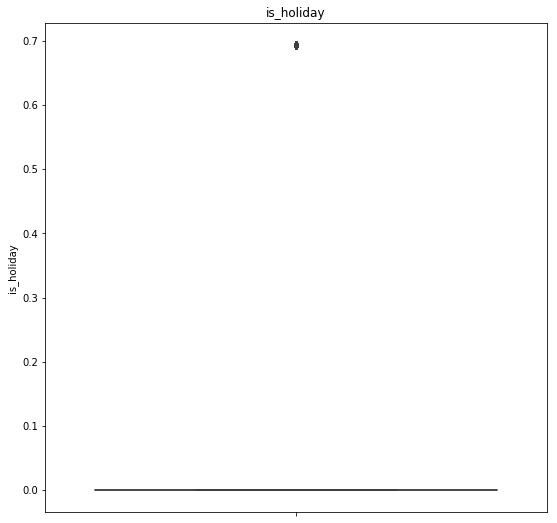

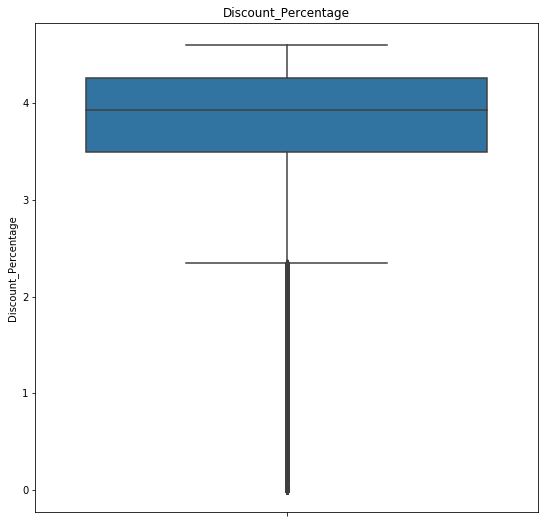

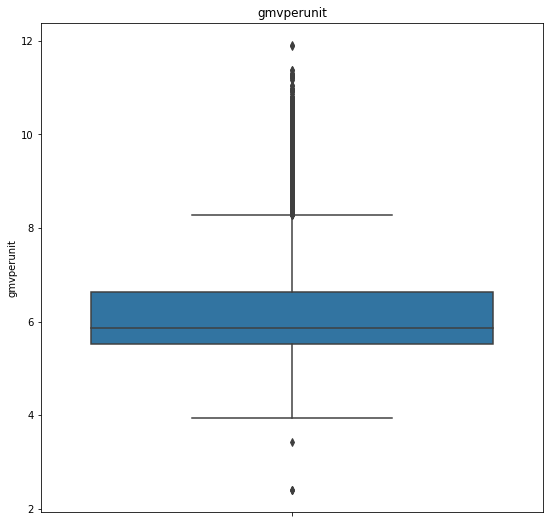

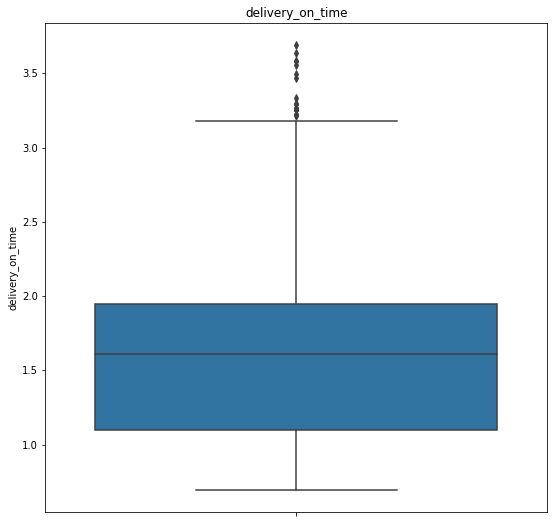

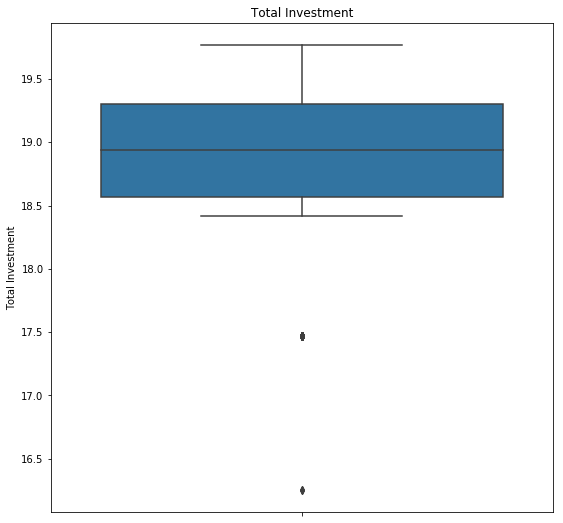

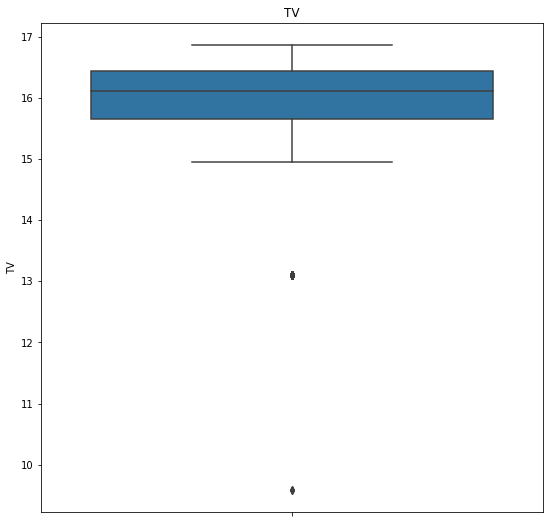

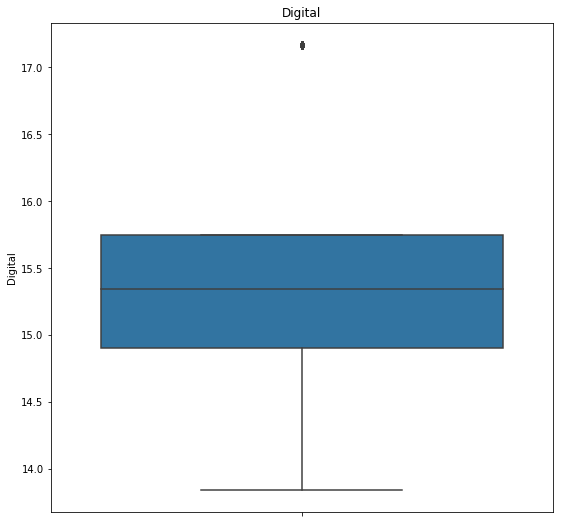

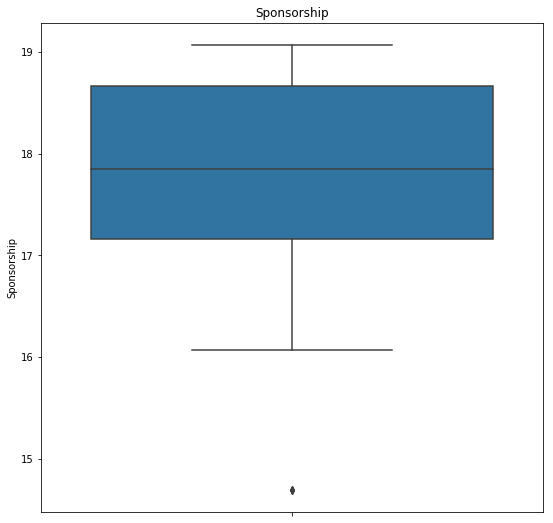

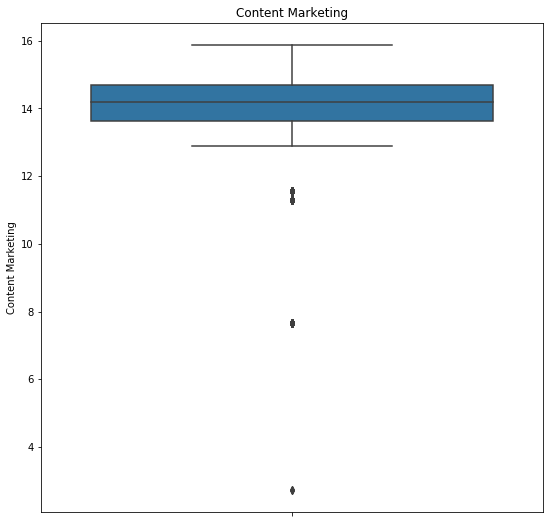

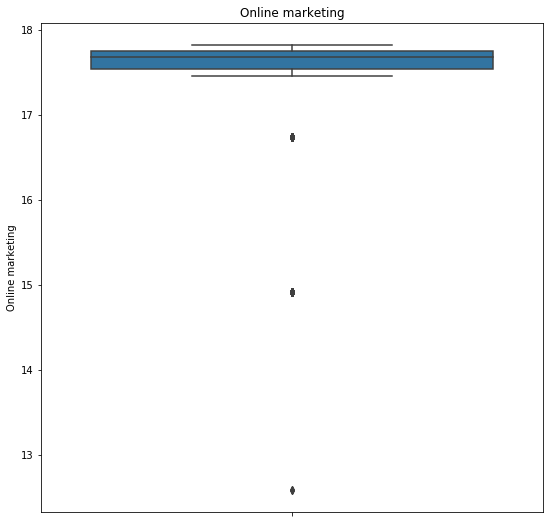

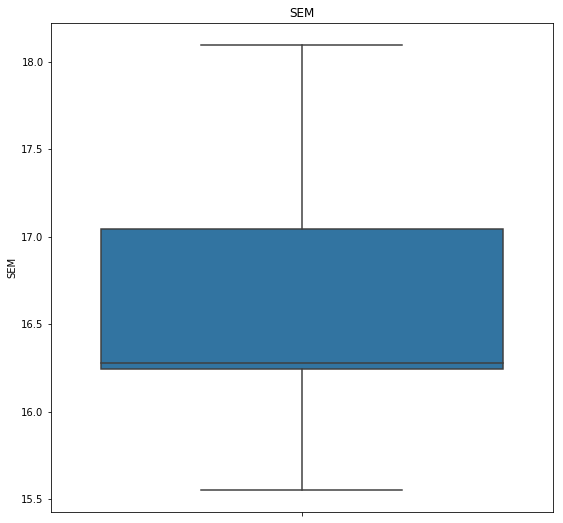

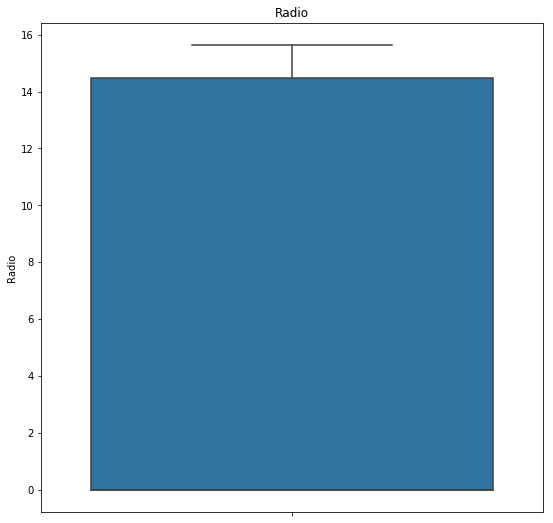

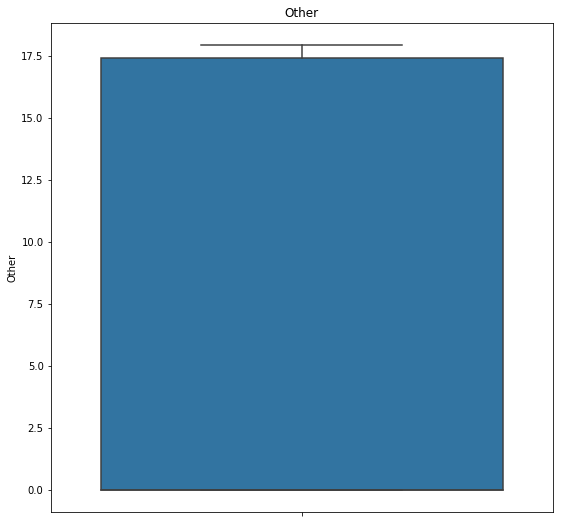

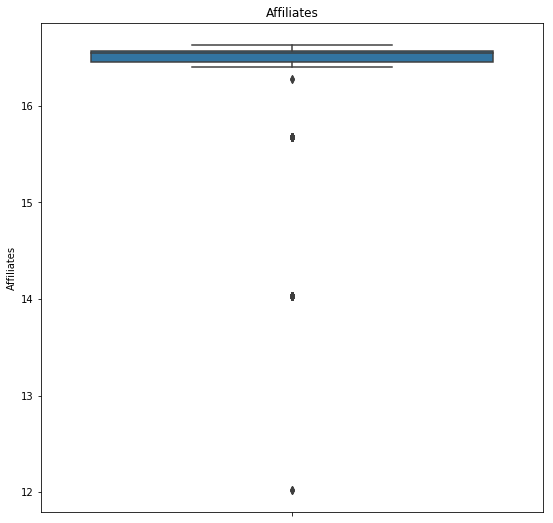

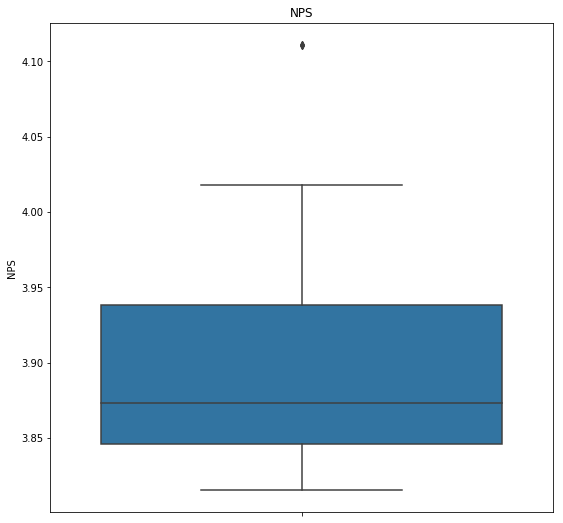

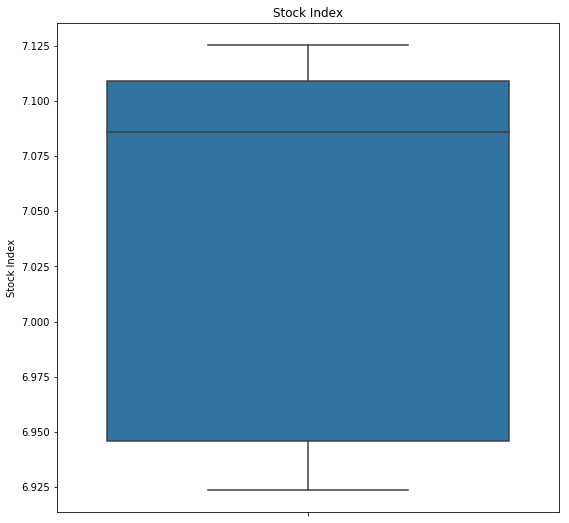

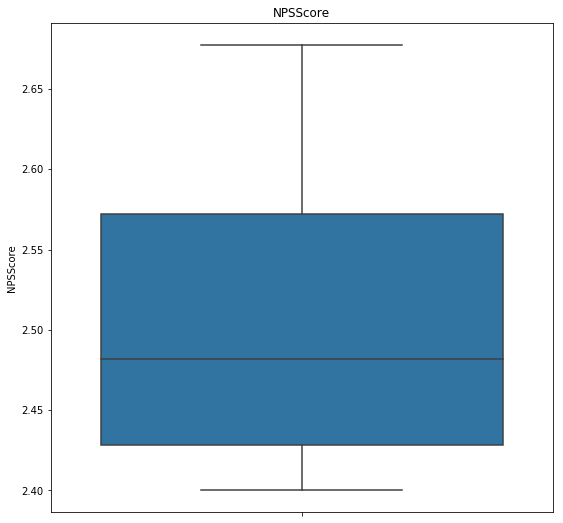

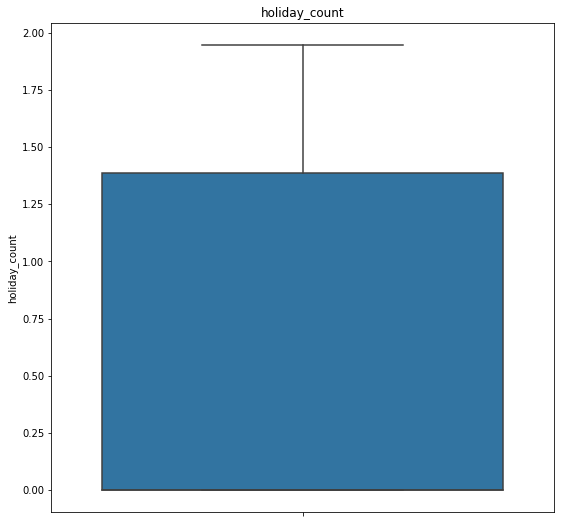

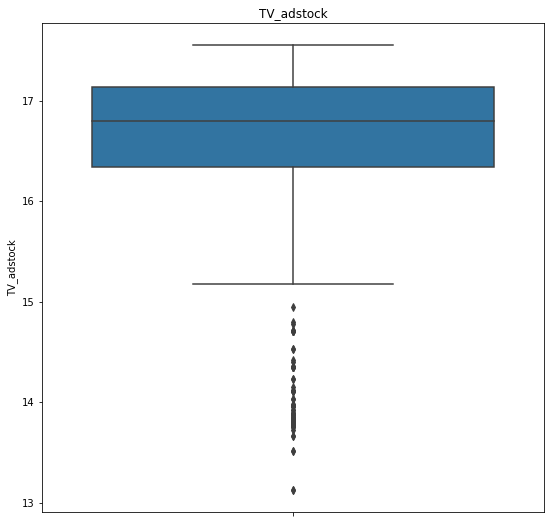

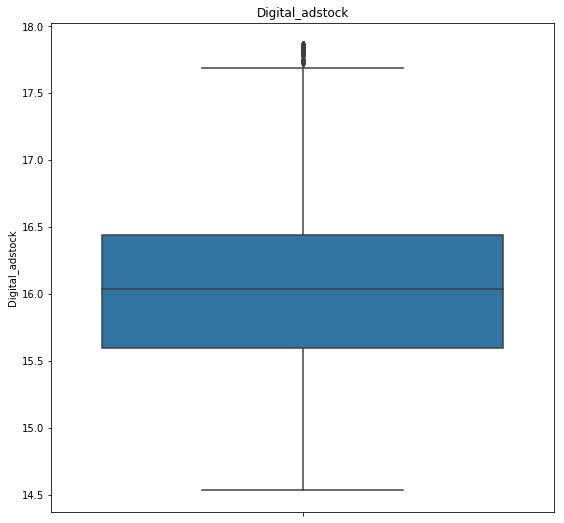

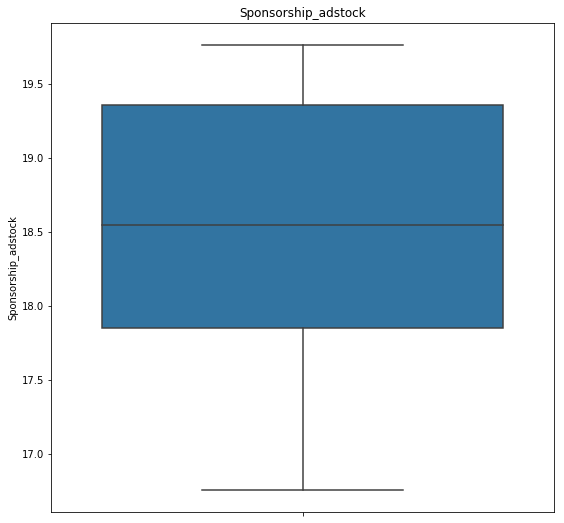

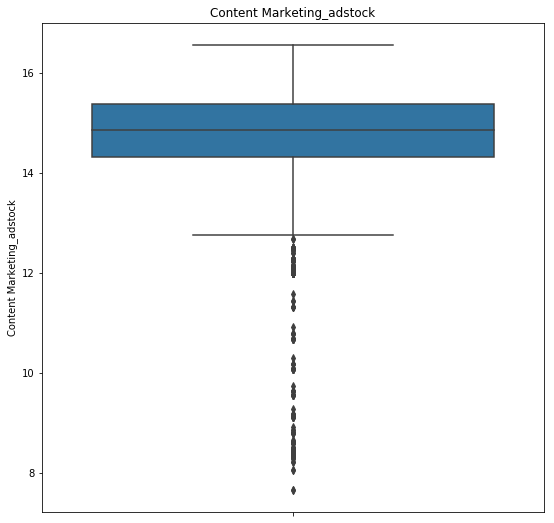

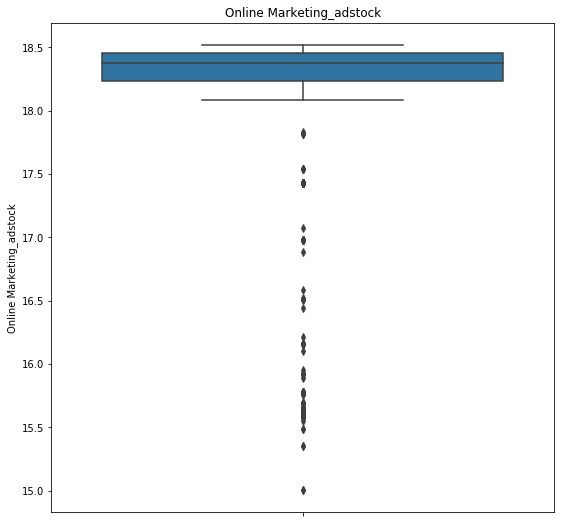

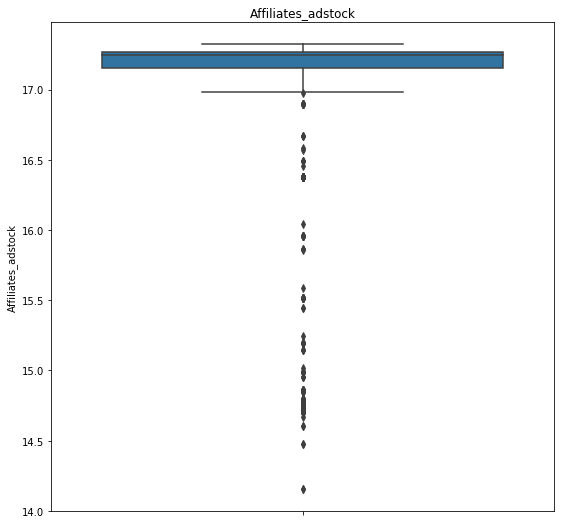

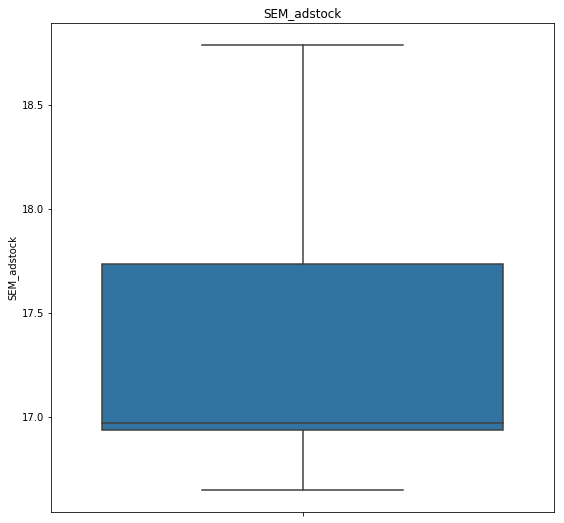

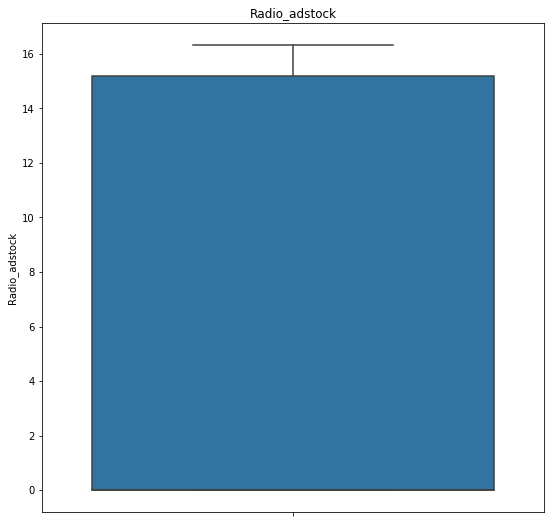

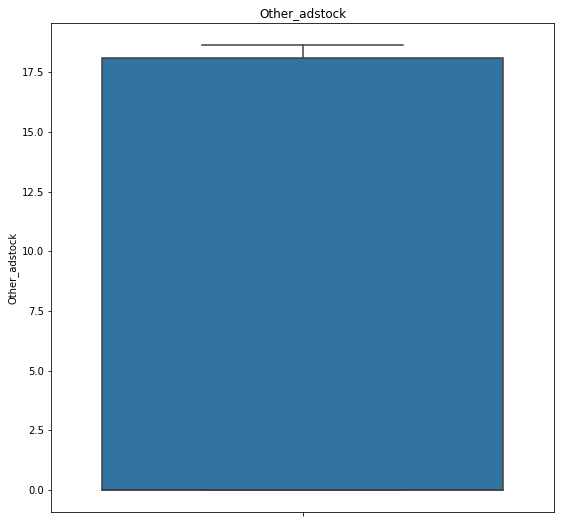

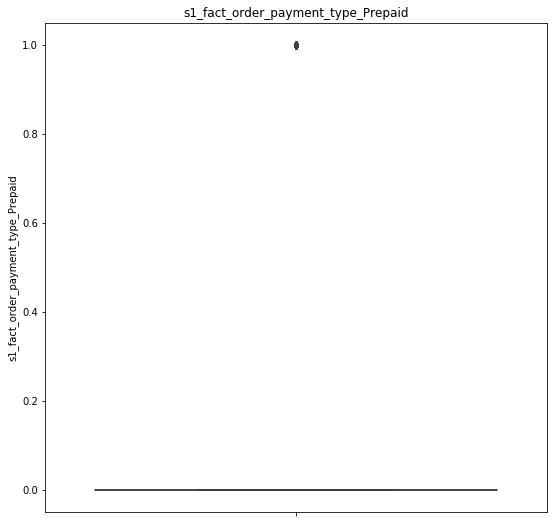

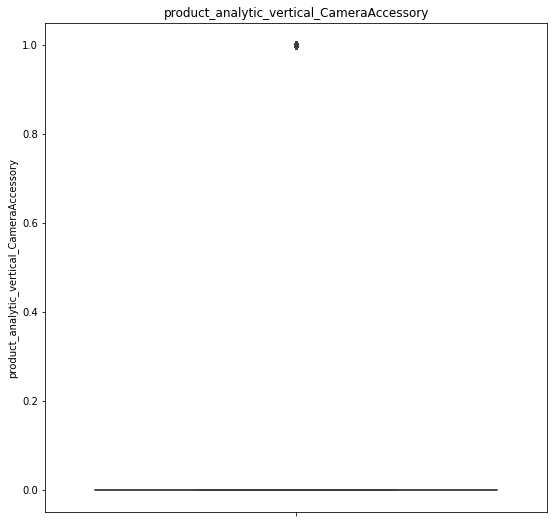

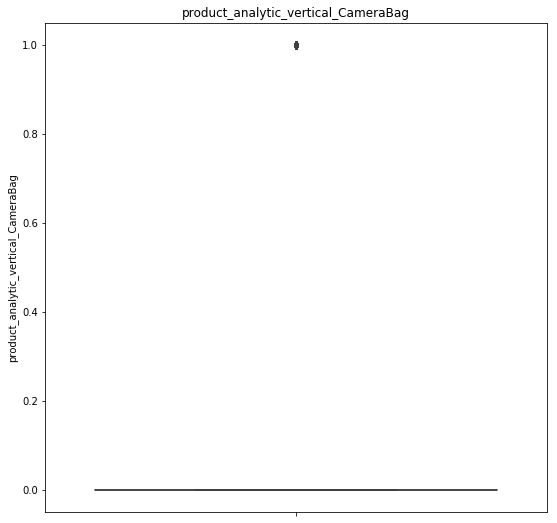

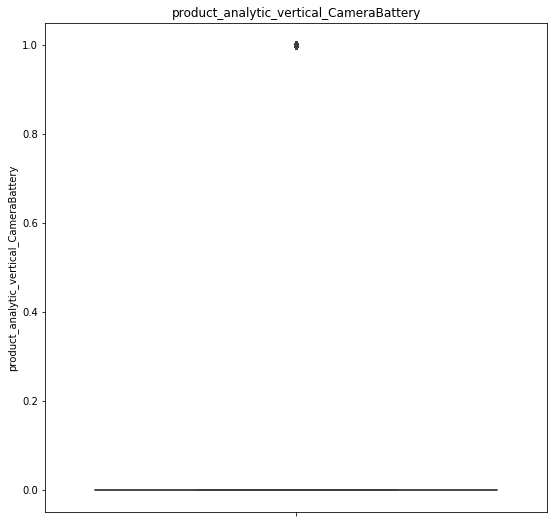

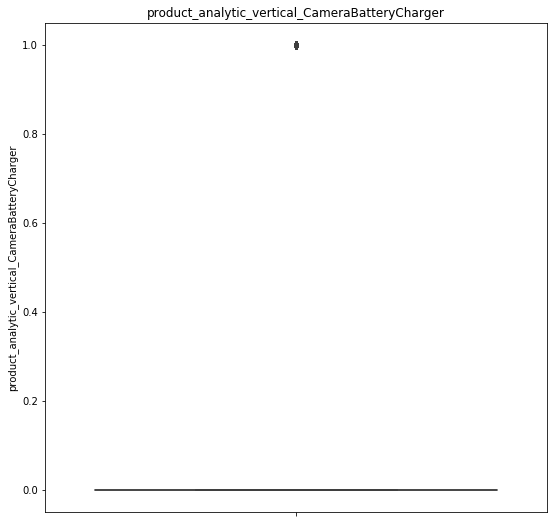

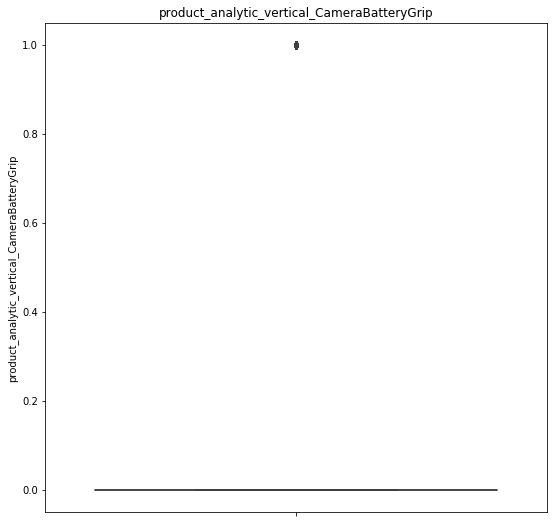

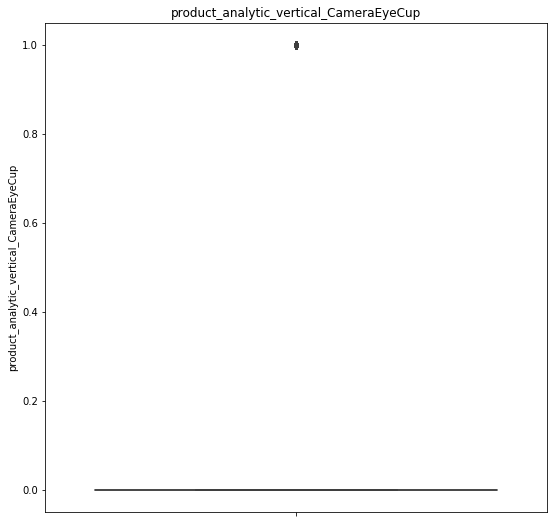

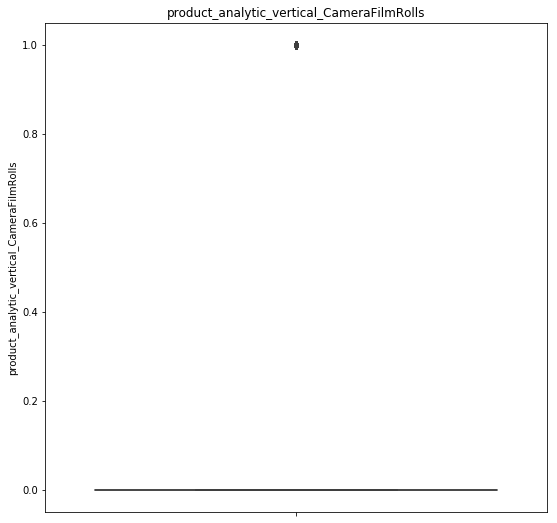

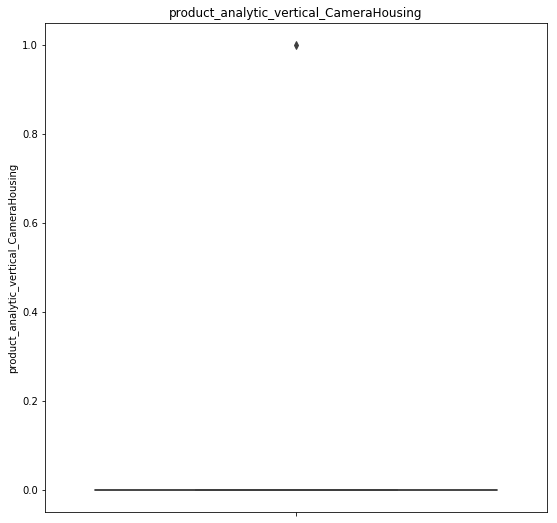

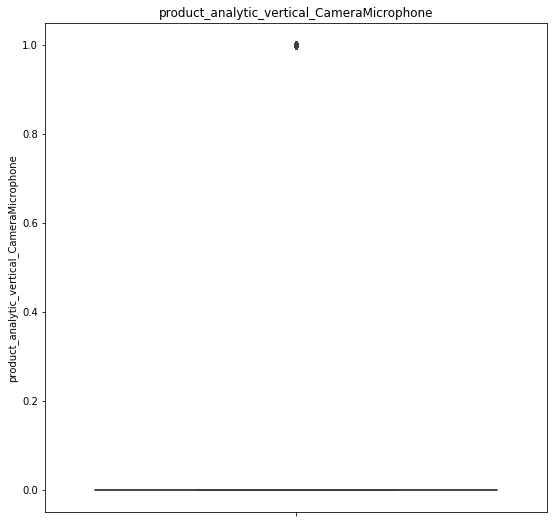

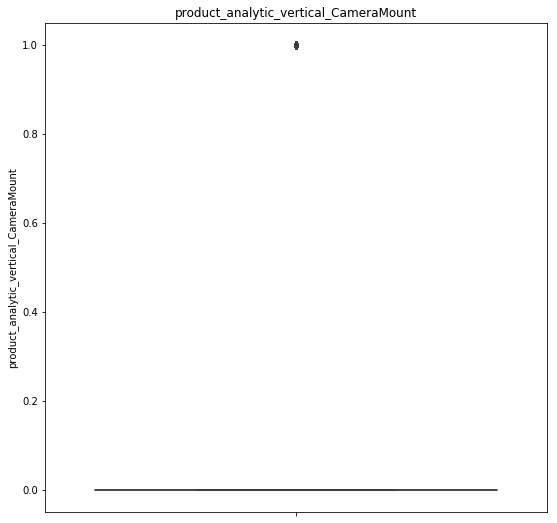

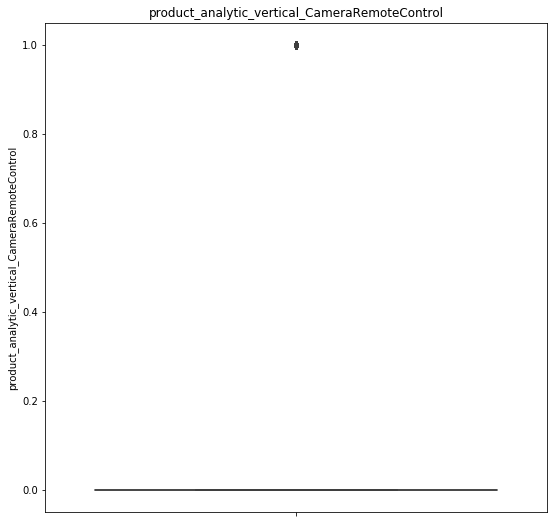

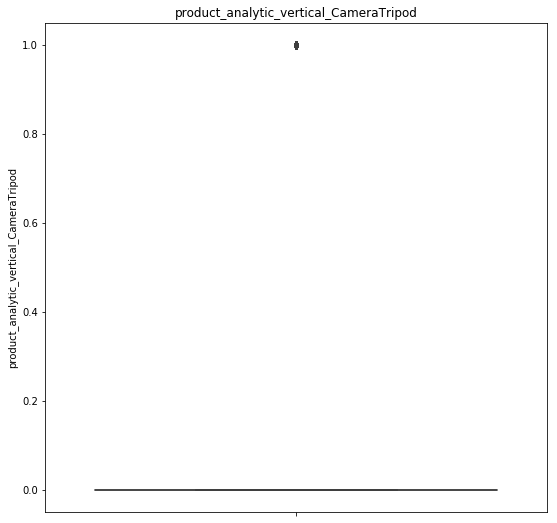

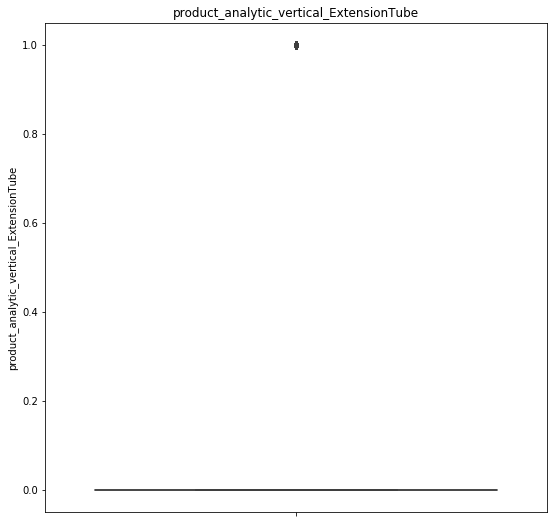

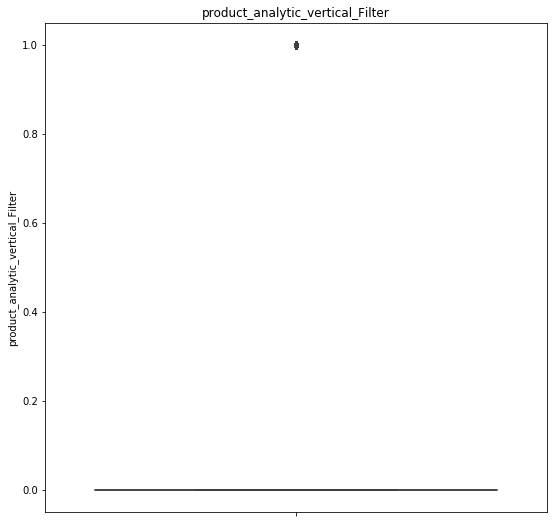

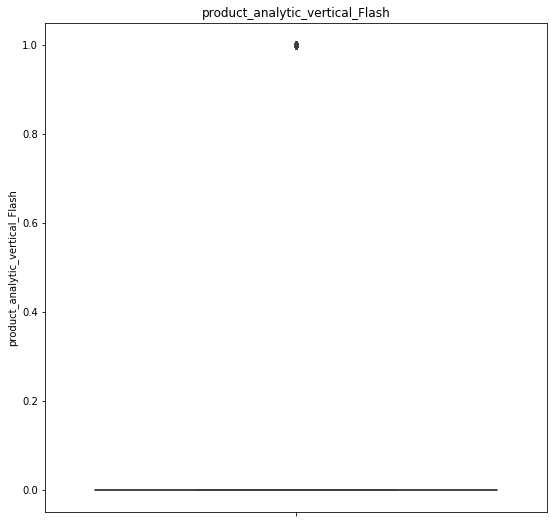

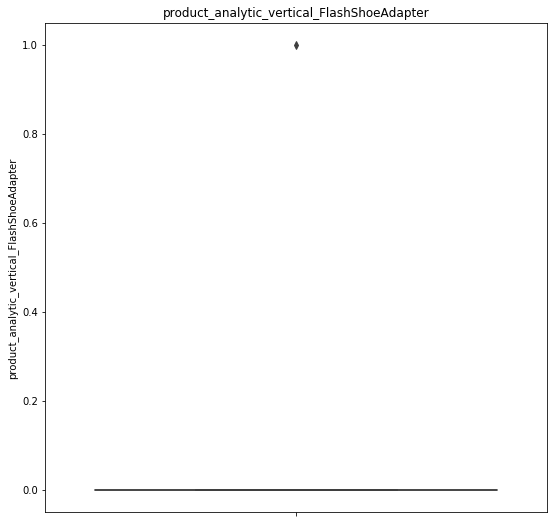

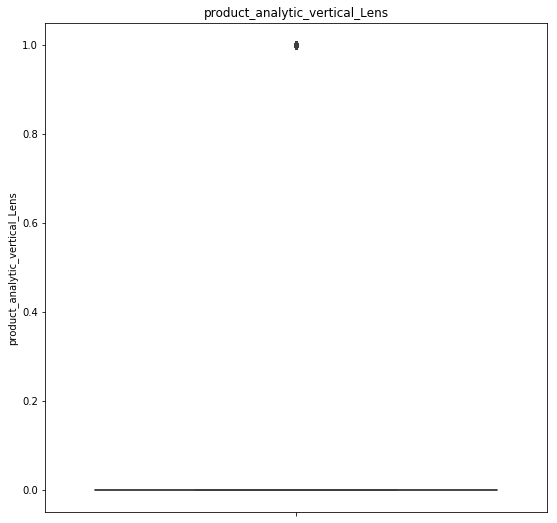

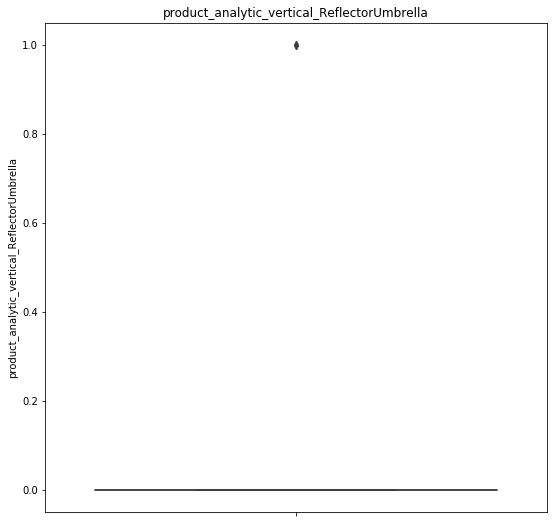

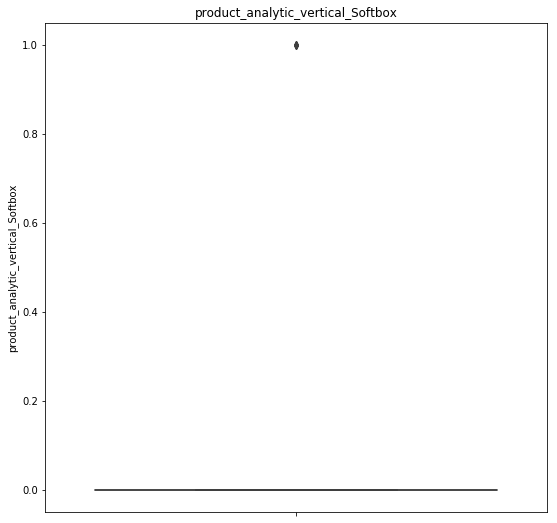

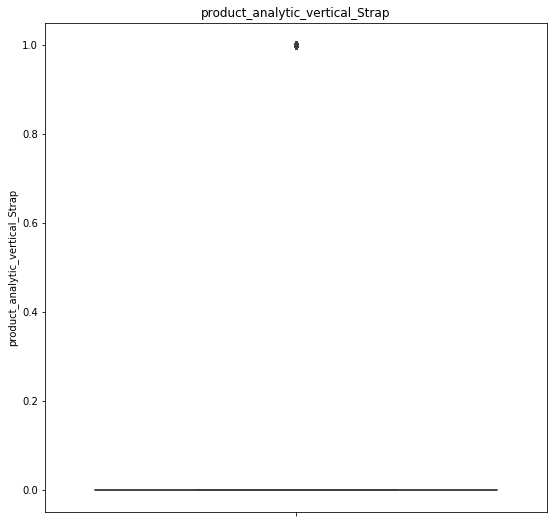

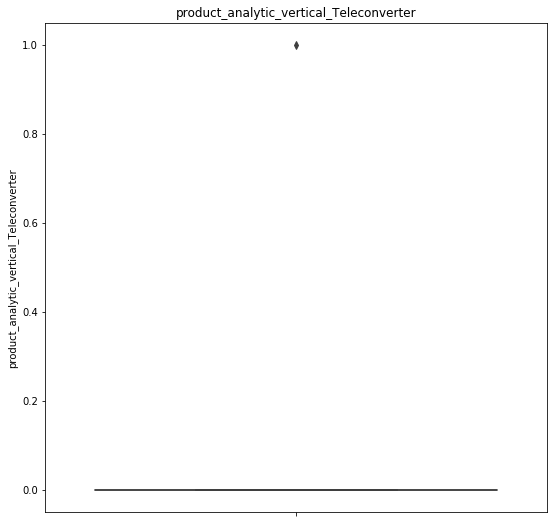

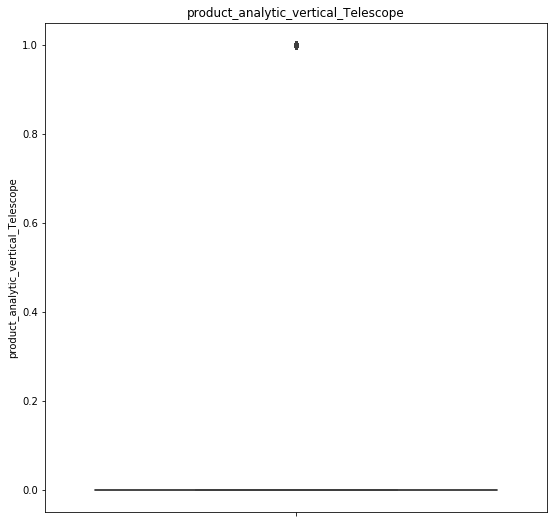

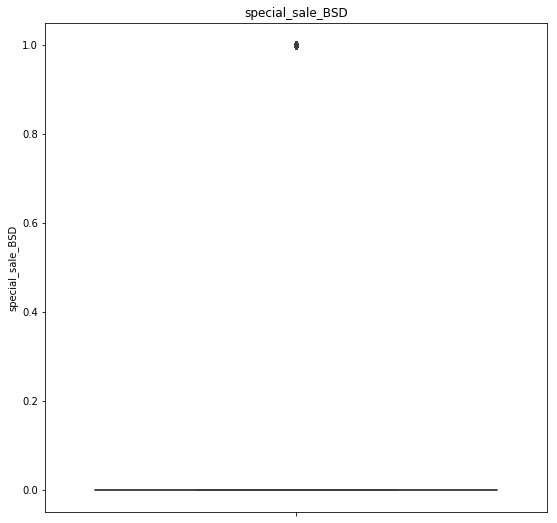

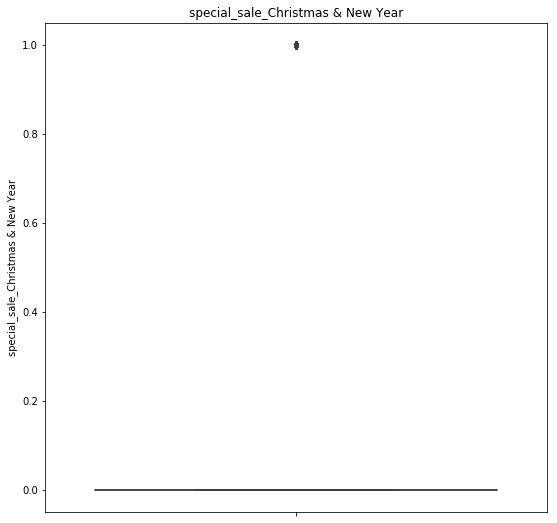

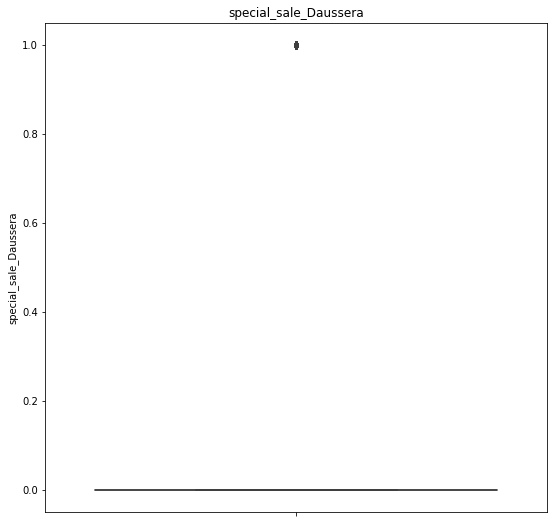

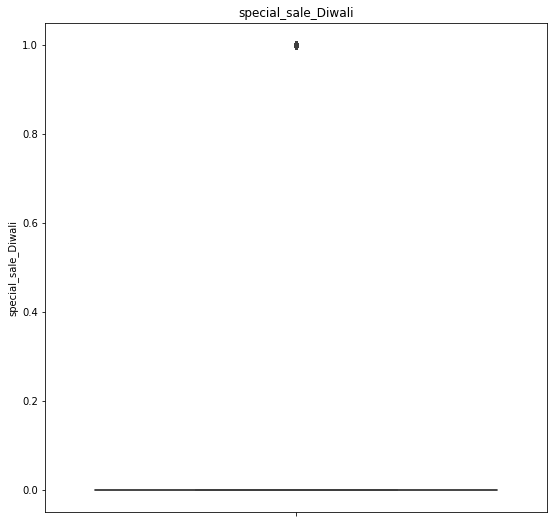

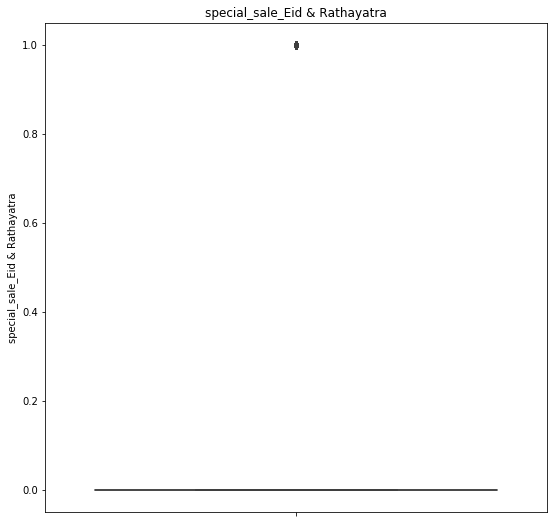

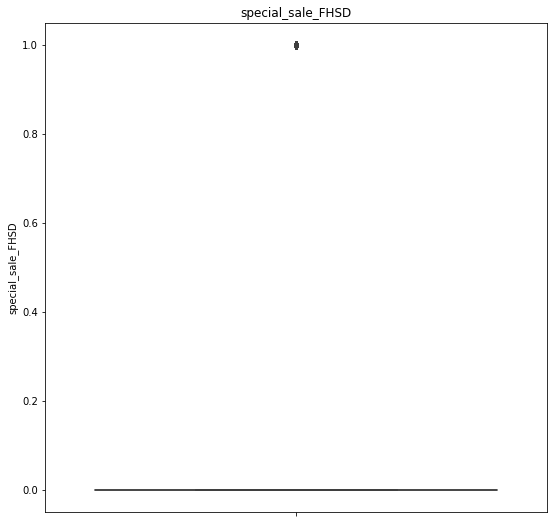

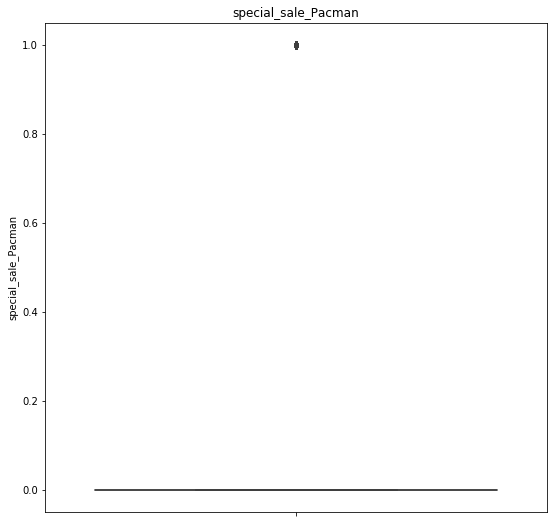

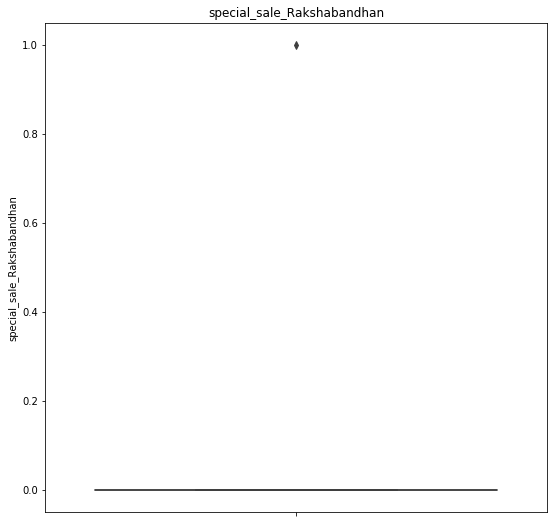

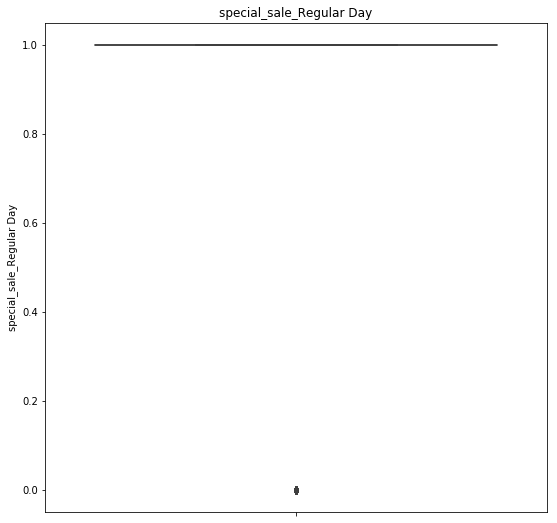

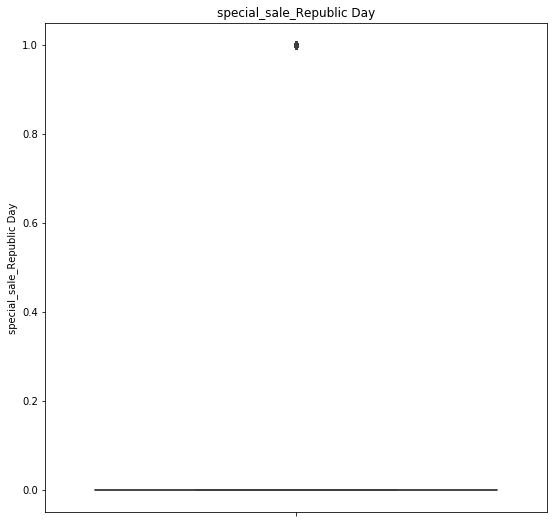

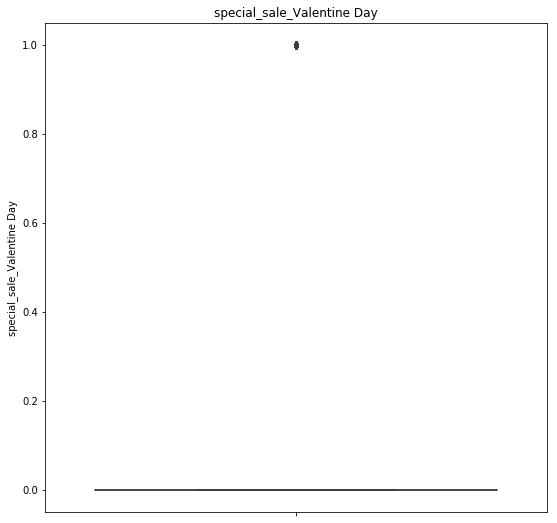

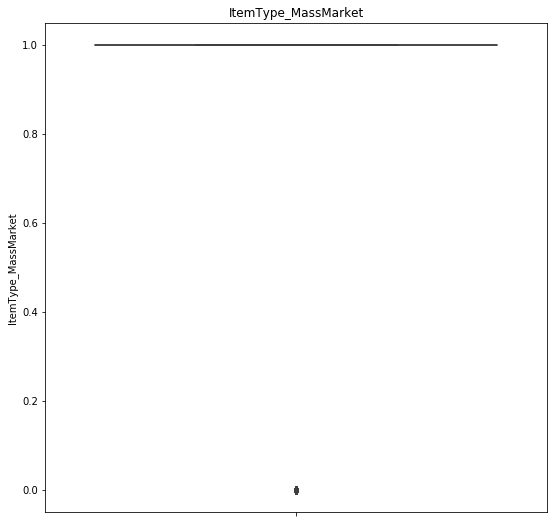

In [73]:
#Checking outliers in dataframe
for col in list(ecart_CA.columns):
    plt.figure(figsize=(9,9))
    sns.boxplot(data=ecart_CA, y=col).set_title(col)

In [52]:
#function for outlier treatment
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [74]:
#removing outliers
ecart_CA = remove_outlier(ecart_CA, 'gmv')
ecart_CA.shape

(109260, 70)

In [75]:
#removing outliers
ecart_CA = remove_outlier(ecart_CA, 'Discount_Percentage')
ecart_CA.shape

(103544, 70)

In [76]:
#removing outliers
ecart_CA = remove_outlier(ecart_CA, 'sla')
ecart_CA.shape

(101940, 70)

In [77]:
#removing outliers
ecart_CA = remove_outlier(ecart_CA, 'Affiliates')
ecart_CA.shape

(91976, 70)

In [78]:
# Import the required library

from sklearn.model_selection import train_test_split

In [79]:
#train-test split 
df_train, df_test = train_test_split(ecart_CA, train_size=0.7, test_size=0.3, random_state=100)

In [80]:
# Import MinMax scaler

from sklearn.preprocessing import MinMaxScaler

In [81]:
scaler = MinMaxScaler()

In [82]:
# Create a list of the variables that you need to scale
varlist = []
dum_cols = list(ecart_CA_dummies.columns)
dum_cols.append('Pay_Day')
dum_cols.append('is_holiday')

for col in ecart_CA.columns:
    if col not in dum_cols:
        varlist.append(col)

In [83]:
varlist

['gmv',
 'units',
 'deliverybdays',
 'deliverycdays',
 'sla',
 'product_mrp',
 'product_procurement_sla',
 'Discount_Percentage',
 'gmvperunit',
 'delivery_on_time',
 'Total Investment',
 'TV',
 'Digital',
 'Sponsorship',
 'Content Marketing',
 'Online marketing',
 'SEM',
 'Radio',
 'Other',
 'Affiliates',
 'NPS',
 'Stock Index',
 'NPSScore',
 'holiday_count',
 'TV_adstock',
 'Digital_adstock',
 'Sponsorship_adstock',
 'Content Marketing_adstock',
 'Online Marketing_adstock',
 'Affiliates_adstock',
 'SEM_adstock',
 'Radio_adstock',
 'Other_adstock']

In [84]:
# Scale these variables using 'fit_transform'
df_train[varlist] = scaler.fit_transform(df_train[varlist])

E:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [85]:
# Let's take a look at the train dataframe now
df_train.head()

,gmv,units,deliverybdays,deliverycdays,sla,product_mrp,product_procurement_sla,Pay_Day,is_holiday,Discount_Percentage,...,special_sale_Daussera,special_sale_Diwali,special_sale_Eid & Rathayatra,special_sale_FHSD,special_sale_Pacman,special_sale_Rakshabandhan,special_sale_Regular Day,special_sale_Republic Day,special_sale_Valentine Day,ItemType_MassMarket
38205,0.35,0.00,0.00,0.00,0.40,0.42,0.53,0.00,0.00,0.50,...,0,0,0,0,0,0,1,0,0,1
66016,0.28,0.00,0.00,0.00,0.40,0.38,0.68,0.00,0.00,0.54,...,0,0,0,0,0,0,1,0,0,1
102853,0.14,0.00,0.00,0.00,0.16,0.21,0.42,0.00,0.00,0.32,...,0,0,0,0,0,0,1,0,0,1
21214,0.70,0.00,0.00,0.00,0.40,0.58,0.26,0.00,0.00,0.63,...,0,0,0,0,0,0,1,0,0,1
27476,0.13,0.00,0.00,0.00,0.29,0.27,0.53,0.00,0.69,0.66,...,0,1,0,0,0,0,0,0,0,1


In [86]:
# Split the train dataset into X and y

y_train = df_train.pop('gmv')
X_train = df_train

In [87]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [88]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [89]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 9.39672065e-01  2.96514126e-03 -2.83532122e-02  1.70390612e-02
  4.79383607e-02 -5.63387839e-02 -1.30200196e-02 -1.67882330e-02
  2.35964237e-02  1.61512951e+00 -2.15558222e-02  1.53049686e+11
 -7.40052576e+10 -5.59511162e+10  1.91877224e+11 -4.13873769e+11
 -1.22114152e+11  1.94543410e+11 -1.78623843e+11  2.57595941e+11
  4.68048779e+11 -1.18981043e+11 -5.56151225e+10  3.05527514e+11
  4.18464062e-03 -5.79312475e-02 -1.23504651e-01 -8.22018917e-03
  2.38971864e-02 -3.90168452e-01  3.02190476e-01  1.43767295e-01
  6.59989108e-02 -6.24366879e-02 -1.22816998e-03  1.98804341e-02
  5.20296182e-02  2.54196343e-03  9.50453297e-03 -1.89575409e+08
  1.57611052e-02  5.55287610e-02 -6.91721079e+08  1.00232901e-01
  7.17686051e-03 -2.55221352e-02 -1.92056225e-02 -5.68897282e-03
  5.41244180e-03 -1.10008993e-02  1.09035191e-02  1.39728508e-03
  3.97278406e-02  1.42941783e-02  1.87132246e-03  1.92903682e+05
 -1.19819509e-02  1.65914509e-02  1.53963428e-03  4.08808397e-02
 -1.15838490e-02  0.00000

In [90]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 12 features
lm = LinearRegression()
rfe1 = RFE(lm, 12)

# Fit with 12 features
rfe1.fit(X_train, y_train)

# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_)  

[ True False False False  True  True False False False  True False False
 False False False False False False False False False False False False
 False False False False False False  True False  True  True False  True
  True False False False False  True False  True False False False False
 False False False False False False False False False False False  True
 False False False False False False False False False]
[ 1 21 16 15  1  1 32 38 19  1 14 11 25 12  4 23 22 29 35 10 24 36 13  9
 45  3  8 26  5  6  1  7  1  1 53  1  1 52 31 46 28  1 47  1 40  2 17 27
 37 20 34 55 18 30 48 50 41 33 43  1 42 57 54 49 56 39 44 51 58]


In [91]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 12 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,units,product_mrp,product_procurement_sla,gmvperunit,Affiliates_adstock,Radio_adstock,Other_adstock,product_analytic_vertical_CameraAccessory,product_analytic_vertical_CameraBag,product_analytic_vertical_CameraFilmRolls,product_analytic_vertical_CameraMicrophone,special_sale_Daussera
38205,1.00,0.00,0.42,0.53,0.79,0.91,0.00,0.00,0,0,0,0,0
66016,1.00,0.00,0.38,0.68,0.74,1.00,1.00,1.00,0,0,0,0,0
102853,1.00,0.00,0.21,0.42,0.61,0.80,0.93,0.97,0,0,0,0,0
21214,1.00,0.00,0.58,0.26,0.93,0.93,0.00,0.00,0,0,0,0,0
27476,1.00,0.00,0.27,0.53,0.60,0.91,0.00,0.00,0,1,0,0,0


In [92]:
# Fitting the model with 12 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 6.179e+04
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        15:49:08   Log-Likelihood:                 94974.
No. Observations:               64383   AIC:                        -1.899e+05
Df Residuals:                   64370   BIC:                        -1.898e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [93]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [94]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Other_adstock,959.99
6,Radio_adstock,957.79
0,const,260.52
5,Affiliates_adstock,1.51
4,gmvperunit,1.46
2,product_mrp,1.41
12,special_sale_Daussera,1.07
3,product_procurement_sla,1.04
1,units,1.01
8,product_analytic_vertical_CameraAccessory,1.01


In [95]:
#drop 1st variable with high vif and p-value
X_train_rfe1.drop('Other_adstock', axis = 1, inplace = True)

In [96]:
# Refitting with 11 variables
X_train_rfe2 = sm.add_constant(X_train_rfe1)

# Fitting the model with 11 variables
lm2 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 6.696e+04
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        15:50:07   Log-Likelihood:                 94774.
No. Observations:               64383   AIC:                        -1.895e+05
Df Residuals:                   64371   BIC:                        -1.894e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [97]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,193.23
4,gmvperunit,1.44
2,product_mrp,1.40
11,special_sale_Daussera,1.07
6,Radio_adstock,1.05
3,product_procurement_sla,1.04
5,Affiliates_adstock,1.03
1,units,1.01
7,product_analytic_vertical_CameraAccessory,1.01
8,product_analytic_vertical_CameraBag,1.01


In [98]:
y_train_price = lm2.predict(X_train_rfe2)

Text(0.5, 0, 'Errors')

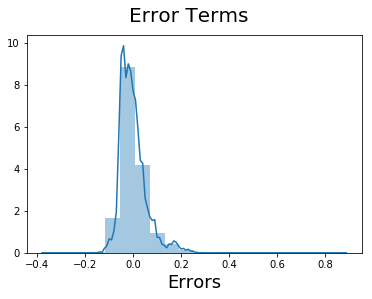

In [99]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [100]:
#fitting test data
df_test[varlist] = scaler.transform(df_test[varlist])

In [101]:
# Split the 'df_test' set into X and y
y_test = df_test.pop('gmv')
X_test = df_test

In [102]:
# Let's check the list 'col2' which had the 10 variables RFE had selected
X_test_rfe2 = X_test[col1]

In [103]:
col1

Index(['units', 'product_mrp', 'product_procurement_sla', 'gmvperunit',
       'Affiliates_adstock', 'Radio_adstock', 'Other_adstock',
       'product_analytic_vertical_CameraAccessory',
       'product_analytic_vertical_CameraBag',
       'product_analytic_vertical_CameraFilmRolls',
       'product_analytic_vertical_CameraMicrophone', 'special_sale_Daussera'],
      dtype='object')

In [104]:
# Let's now drop the variables we had manually eliminated as well
X_test_rfe2 = X_test_rfe2.drop(['Other_adstock'], axis = 1)

In [105]:
# Add a constant to the test set created
X_test_rfe2 = sm.add_constant(X_test_rfe2)
X_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27593 entries, 104910 to 84613
Data columns (total 12 columns):
const                                         27593 non-null float64
units                                         27593 non-null float64
product_mrp                                   27593 non-null float64
product_procurement_sla                       27593 non-null float64
gmvperunit                                    27593 non-null float64
Affiliates_adstock                            27593 non-null float64
Radio_adstock                                 27593 non-null float64
product_analytic_vertical_CameraAccessory     27593 non-null uint8
product_analytic_vertical_CameraBag           27593 non-null uint8
product_analytic_vertical_CameraFilmRolls     27593 non-null uint8
product_analytic_vertical_CameraMicrophone    27593 non-null uint8
special_sale_Daussera                         27593 non-null uint8
dtypes: float64(7), uint8(5)
memory usage: 1.8 MB


In [106]:
# Making predictions
y_pred = lm2.predict(X_test_rfe2)

Text(0, 0.5, 'y_pred')

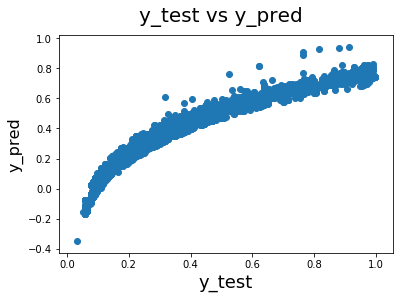

In [107]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

In [108]:
# r2_score for 6 variables
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.920281612844806

In [109]:
from sklearn.metrics import mean_squared_error

from math import sqrt

rmse = sqrt(mean_squared_error(y_test, y_pred))

print(rmse)

0.05469379950606297


In [110]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
import numpy as np
regr = LinearRegression() 

In [111]:
scores = cross_val_score(regr, X_train, y_train, cv = 5)    #cv is the number of folds, scores will give an array of scores

print(scores, np.mean(scores), np.std(scores))

#To get predictions (y_hat) and check them all in one using cross validation

predictions = cross_val_predict(regr, X_test, y_test, cv = 5)     #y_test is needed here in predictions to get scores for each fold of cv

accuracy = metrics.r2_score(y_test, predictions)  #this says the accuracy of the predictions from the best cv fold


#If this is good, continue to fit the model on the data


regr.fit(X_train, y_train)

y_hat = regr.predict(X_test)      #this gives me my predictions

regr.score(X_test, y_test)  

[-4.46505713e+10  9.21205224e-01  9.23553501e-01 -1.27587582e+06
 -5.41380248e+10] -19757974383.53109 24383238027.872776


0.9228705273652085

In [112]:
accuracy

-388511619108.90466

In [113]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [114]:
folds=KFold(n_splits=5, shuffle=True, random_state=100)
scores=cross_val_score(lm,X_train,y_train,scoring='r2',cv=folds)
scores

array([ 9.22079733e-01, -1.41707720e+10,  9.22018325e-01,  9.23795107e-01,
       -1.61381734e+11])

In [115]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import numpy as np

# prepare a range of alpha values to test
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
# create and fit a ridge regression model, testing each alpha
model = Lasso()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(X_train, y_train)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)

E:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
E:

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
0.9222224916826208
0.0


E:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [116]:
from scipy.stats import uniform as sp_rand
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'alpha': sp_rand()}
# create and fit a ridge regression model, testing random alpha values
model = Lasso()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100)
rsearch.fit(X_train, y_train)
print(rsearch)
# summarize the results of the random parameter search
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
          estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=None,
          param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001BE30E437F0>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)
0.8813999745181916
0.0020793678077679623


In [117]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [118]:
# model with optimal alpha
lm = Lasso(alpha=0.01)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.6886552174199619
0.6911753277907677


In [119]:
# lasso model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', -0.307),
 ('units', 0.0),
 ('deliverybdays', -0.0),
 ('deliverycdays', -0.0),
 ('sla', 0.0),
 ('product_mrp', 0.0),
 ('product_procurement_sla', 0.0),
 ('Pay_Day', 0.0),
 ('is_holiday', 0.0),
 ('Discount_Percentage', -0.0),
 ('gmvperunit', 0.835),
 ('delivery_on_time', -0.0),
 ('Total Investment', 0.0),
 ('TV', 0.0),
 ('Digital', 0.0),
 ('Sponsorship', 0.0),
 ('Content Marketing', 0.0),
 ('Online marketing', 0.0),
 ('SEM', 0.0),
 ('Radio', -0.0),
 ('Other', -0.0),
 ('Affiliates', 0.0),
 ('NPS', -0.0),
 ('Stock Index', 0.0),
 ('NPSScore', -0.0),
 ('holiday_count', -0.0),
 ('TV_adstock', 0.0),
 ('Digital_adstock', 0.0),
 ('Sponsorship_adstock', 0.0),
 ('Content Marketing_adstock', 0.0),
 ('Online Marketing_adstock', 0.0),
 ('Affiliates_adstock', 0.0),
 ('SEM_adstock', 0.0),
 ('Radio_adstock', -0.0),
 ('Other_adstock', -0.0),
 ('s1_fact_order_payment_type_Prepaid', 0.0),
 ('product_analytic_vertical_CameraAccessory', -0.0),
 ('product_analytic_vertical_CameraBag', 0.0),
 ('p